# Book Recommendation System 

## Milestone 1

In [1]:
# importing required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Collection

In [4]:
# loading datasets, downlaoded from Kaggle
# 3 datasets
# Books.csv   Ratings.csv    Users.csv

books_path = "./Data/Books.csv"
ratings_path = "./Data/Ratings.csv"
users_path = "./Data/Users.csv"

In [6]:
df_books = pd.read_csv(books_path)
df_ratings = pd.read_csv(ratings_path)
df_users = pd.read_csv(users_path)

C:\Users\prana\AppData\Local\Temp\ipykernel_36584\1781678031.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv(books_path)


In [7]:
# Dimensions of datasets - number of rows and columns
print("Dimensions :")
print("Books dataset : ", df_books.shape)
print("Ratings dataset : ", df_ratings.shape)
print("Users dataset : ", df_users.shape)

Dimensions :
Books dataset :  (271360, 8)
Ratings dataset :  (1149780, 3)
Users dataset :  (278858, 3)


In [8]:
# Information about the dataset contents
print("Datasets Contents and other Info")
print("="*50)
print("\nBooks.csv")
df_books.info()
print("-"*100)
print("\nRatings.csv")
df_ratings.info()
print("-"*100)
print("\nUsers.csv")
df_users.info()
print("-"*100)

Datasets Contents and other Info

Books.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
----------------------------------------------------------------------------------------------------

Ratings.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    

In [12]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### 2. Data Preprocessing

##### 2.1 Books.csv

In [25]:
# dropping images columns from books.csv as they might not be useful
df_books.drop(columns = ["Image-URL-S", "Image-URL-M"], inplace = True)

In [27]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-L          271357 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


In [29]:
# checking if we have non-numeric entries for "Year of publication"
non_numeric_years = df_books['Year-Of-Publication'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

In [30]:
non_numeric_years

3

In [48]:
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')

In [50]:
# converting non-numeric entries of year can help us in performing time-based analysis
# Dropping rows where year could not be converted
df_books = df_books.dropna(subset=['Year-Of-Publication'])
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

In [52]:
# Checking for missing values in the dataset
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-L            0
dtype: int64

In [54]:
# Handling missing values
# Filling missing Book-Author and Publisher records with "Unknown"
df_books["Book-Author"]=df_books["Book-Author"].fillna("Unknown")
df_books["Publisher"]=df_books["Publisher"].fillna("Unknown")

In [56]:
# checking for missing values after handling them
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-L            0
dtype: int64

In [58]:
# checking for duplicates if any
df_books.duplicated().sum()

0

##### 2.2 Ratings.csv

In [62]:
# checking for any missing data
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [64]:
# checking for any duplicates
df_ratings.duplicated().sum()

0

In [66]:
# number of ratings each user has given
df_ratings["User-ID"].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

##### 2.3 Users.csv

In [70]:
# checking for any missing values
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [72]:
# filling missing age values with median
median_age=df_users["Age"].median()
df_users["Age"]=df_users["Age"].fillna(median_age)

In [74]:
df_users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [76]:
# dropping "location", as it is not a significant attribute
df_users.drop(columns = ["Location"], inplace = True)

In [77]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      278858 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.3 MB


In [78]:
# checking for duplicate records, if any
df_users.duplicated().sum()

0

##### Merging the datasets for building recommendation system

In [84]:
print("Books.csv : ", df_books.columns)
print("Ratings.csv : ", df_ratings.columns)
print("Users.csv : ", df_users.columns)

Books.csv :  Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L'],
      dtype='object')
Ratings.csv :  Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Users.csv :  Index(['User-ID', 'Age'], dtype='object')


In [86]:
# Merging Ratings.csv and Users.csv on "User-ID"
df_ratings_users = pd.merge(df_ratings, df_users, on="User-ID", how="inner")

In [88]:
df_ratings_users.head()

,User-ID,ISBN,Book-Rating,Age
0,276725,034545104X,0,32.0
1,276726,0155061224,5,32.0
2,276727,0446520802,0,16.0
3,276729,052165615X,3,16.0
4,276729,0521795028,6,16.0


In [90]:
# The above ratings_users dataset can be merged with Books.csv on "ISBN"
df = pd.merge(df_ratings_users, df_books, on="ISBN", how="inner")

##### Merging creates a consolidated dataset containing user details, ratings and book details. This final dataset df can be now used for building recommnedation system.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031132 entries, 0 to 1031131
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031132 non-null  int64  
 1   ISBN                 1031132 non-null  object 
 2   Book-Rating          1031132 non-null  int64  
 3   Age                  1031132 non-null  float64
 4   Book-Title           1031132 non-null  object 
 5   Book-Author          1031132 non-null  object 
 6   Year-Of-Publication  1031132 non-null  int32  
 7   Publisher            1031132 non-null  object 
 8   Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 66.9+ MB


In [93]:
df.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,276725,034545104X,0,32.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,32.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...


#### 3. Exploratory Data Analysis

##### 3.1 Books.csv

In [119]:
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
count,271357,271357,271357,271357.000000,271357,271357
unique,271357,242132,102020,NaN,16804,271041
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,NaN,7535,2
mean,NaN,NaN,NaN,1959.760817,NaN,NaN
std,NaN,NaN,NaN,257.994226,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN


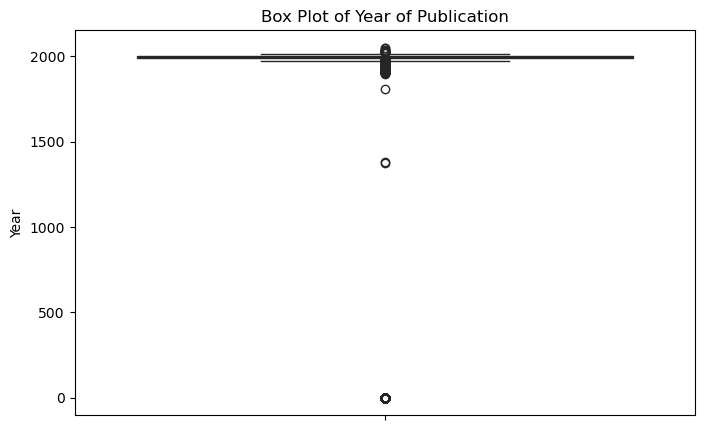

In [169]:
# Box plot for Books dataset - helps in identifying books with incorrect or outdated publication years (e.g., year = 0 or year < 1800).
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_books['Year-Of-Publication'], color='purple')
plt.title("Box Plot of Year of Publication")
plt.ylabel("Year")
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_36584\4254356600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="magma")


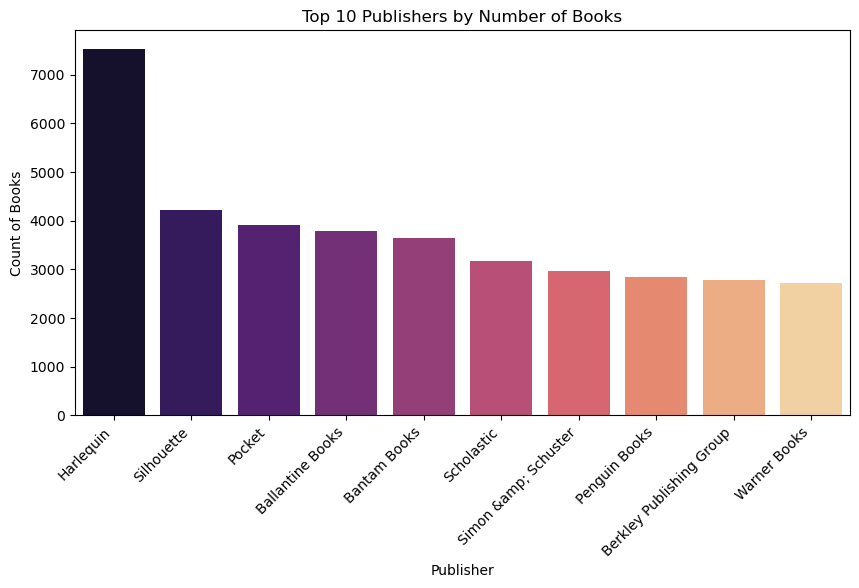

In [110]:
# Top 10 publishers by book count - this indicates sources of quality content, can be an useful insight tp provide recommendations from trusted publishers to the users.
top_publishers = df_books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="magma")
plt.title("Top 10 Publishers by Number of Books")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count of Books")
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_36584\3737788203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.index, y=top_authors.values, palette="cool")


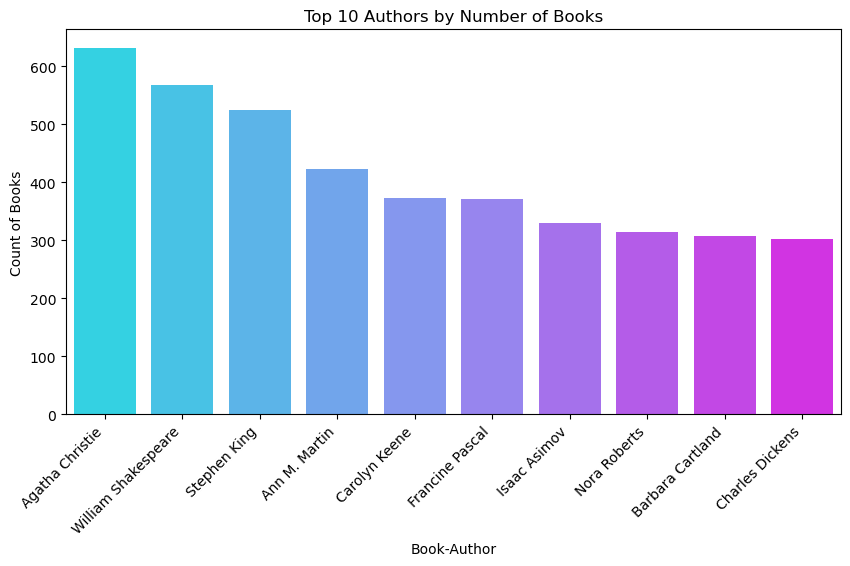

In [114]:
# Top 10 authors by book count
top_authors = df_books['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.index, y=top_authors.values, palette="cool")
plt.title("Top 10 Authors by Number of Books")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count of Books")
plt.show()

##### 3.2 Ratings.csv

In [126]:
df_ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


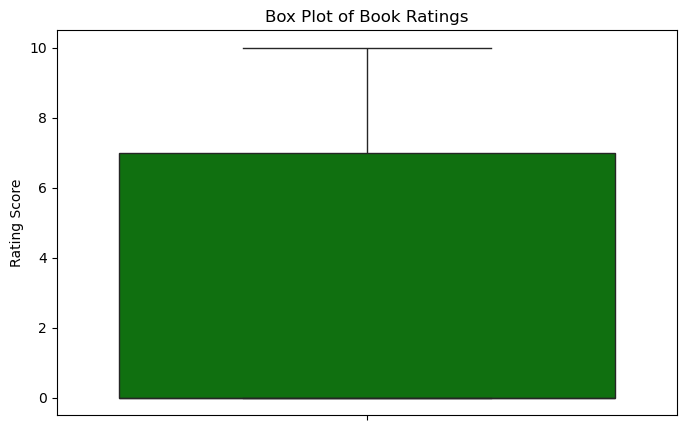

In [179]:
# Box plot for Ratings dataset - identifies unusual rating distributions (e.g., whether ratings cluster around extremes like 0 or 10).
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_ratings['Book-Rating'], color='green')
plt.title("Box Plot of Book Ratings")
plt.ylabel("Rating Score")
plt.show()

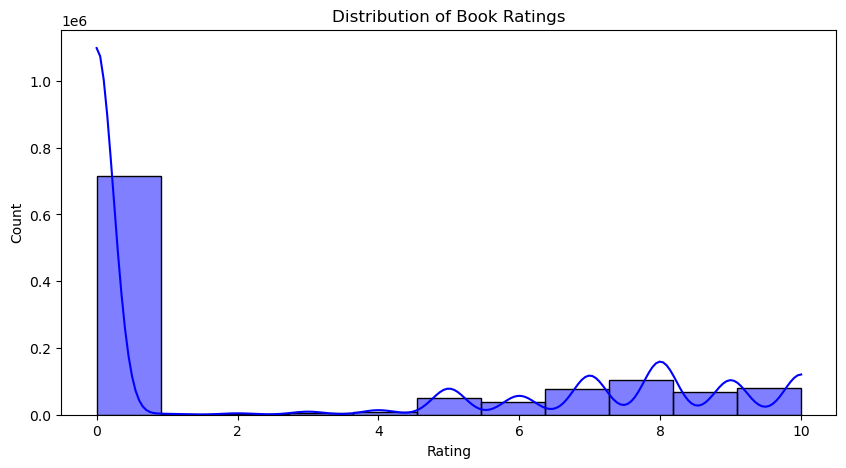

In [128]:
# Distribution of Book Ratings - this distribution shows how users rate books, revealing tendencies (e.g., bias toward high or low ratings); crucial for collaborative filtering models
plt.figure(figsize=(10,5))
sns.histplot(df_ratings['Book-Rating'], bins=11, kde=True, color='blue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

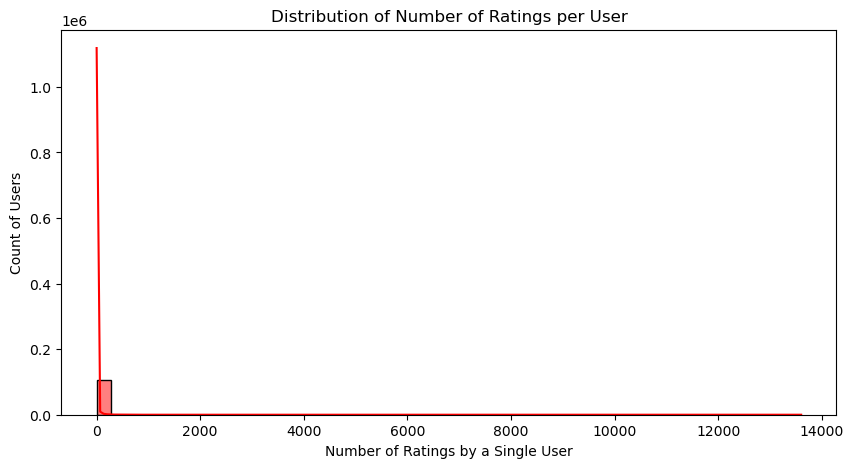

In [130]:
# Distribution of Number of Ratings per User - helps identify highly active users and users with sparse data.
ratings_per_user = df_ratings.groupby('User-ID')['Book-Rating'].count()
plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user, bins=50, kde=True, color='red')
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings by a Single User")
plt.ylabel("Count of Users")
plt.show()

##### 3.3 users.csv

In [140]:
df_users.describe(include='all')

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,33.658568
std,80499.51502,11.282618
min,1.00000,0.000000
25%,69715.25000,29.000000
50%,139429.50000,32.000000
75%,209143.75000,35.000000
max,278858.00000,244.000000


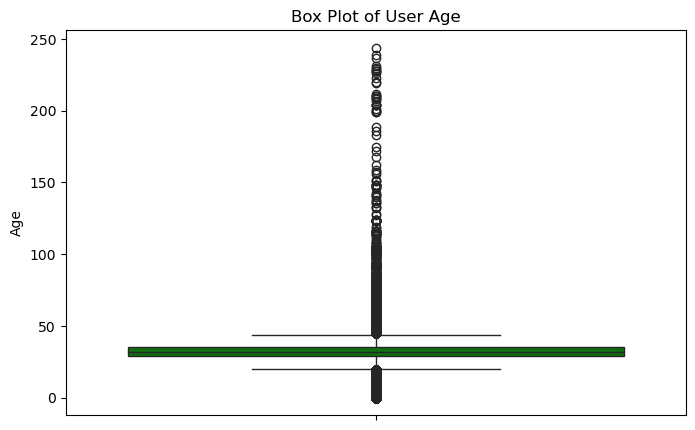

In [185]:
# Box plot for Users dataset - helps in detecting unrealistic ages (e.g., values below 5 or above 100), helping decide whether to filter extreme ages.
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_users['Age'], color='green')
plt.title("Box Plot of User Age")
plt.ylabel("Age")
plt.show()

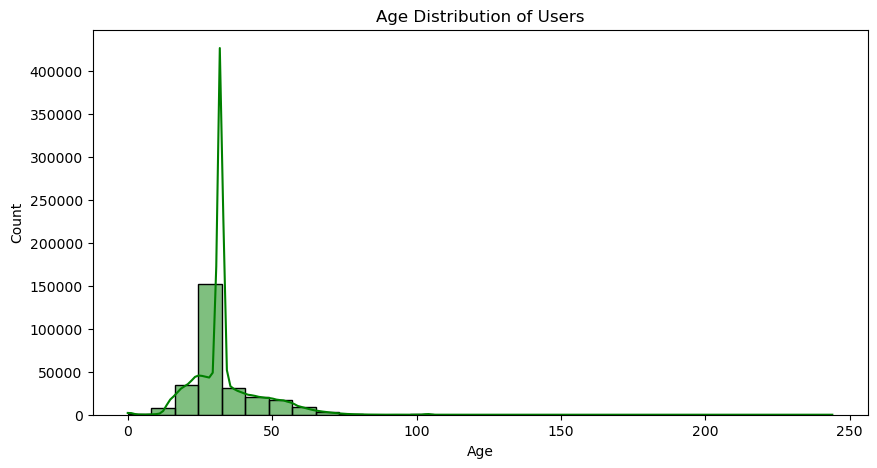

In [144]:
# Age Distribution of Users - Age is critical for personalization; this distribution helps in segmenting users and tailoring recommendations
plt.figure(figsize=(10,5))
sns.histplot(df_users['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### EDA on Final Dataset(Merged) df

In [149]:
df.describe(include='all')

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
count,1.031132e+06,1031132,1.031132e+06,1.031132e+06,1031132,1031132,1.031132e+06,1031132,1031132
unique,NaN,270148,NaN,NaN,241068,101585,NaN,16726,269839
top,NaN,0971880107,NaN,NaN,Wild Animus,Stephen King,NaN,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...
freq,NaN,2502,NaN,NaN,2502,10053,NaN,34724,2502
mean,1.405944e+05,NaN,2.839056e+00,3.594331e+01,NaN,NaN,1.968195e+03,NaN,NaN
std,8.052476e+04,NaN,3.854159e+00,1.228580e+01,NaN,NaN,2.311015e+02,NaN,NaN
min,2.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN
25%,7.041500e+04,NaN,0.000000e+00,3.100000e+01,NaN,NaN,1.992000e+03,NaN,NaN
50%,1.412100e+05,NaN,0.000000e+00,3.200000e+01,NaN,NaN,1.997000e+03,NaN,NaN
75%,2.114260e+05,NaN,7.000000e+00,4.100000e+01,NaN,NaN,2.001000e+03,NaN,NaN


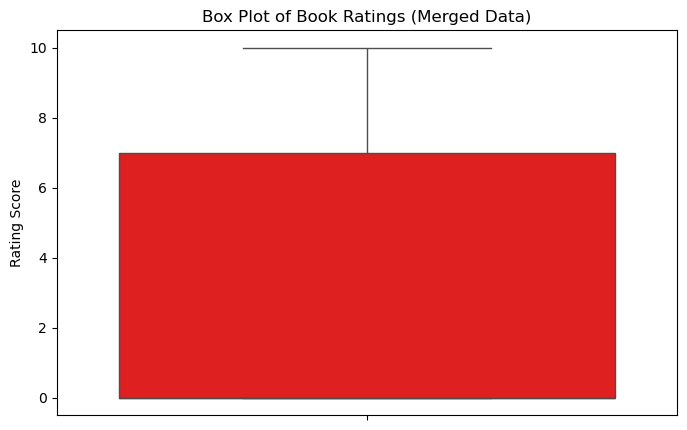

In [189]:
# Box plot on the final dataset - makes sure that rating distribution is reasonable upon merging datasets.
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Book-Rating'], color='red')
plt.title("Box Plot of Book Ratings (Merged Data)")
plt.ylabel("Rating Score")
plt.show()

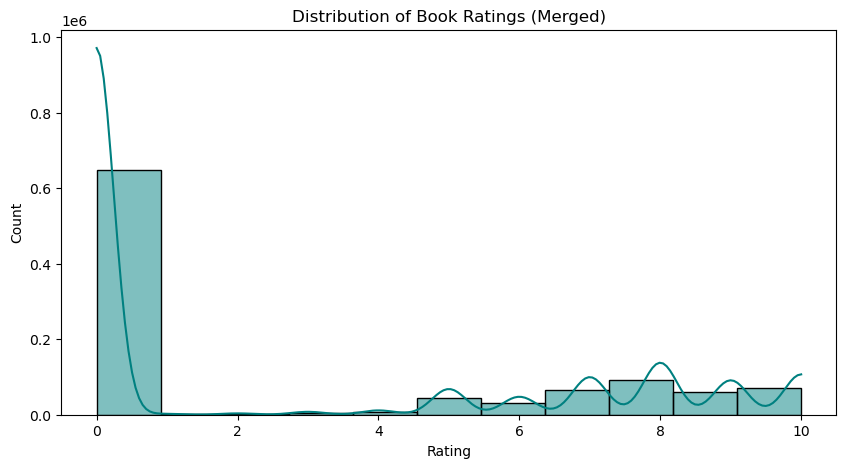

In [151]:
# Distribution of Book Ratings in Final Dataset
plt.figure(figsize=(10,5))
sns.histplot(df['Book-Rating'], bins=11, kde=True, color='teal')
plt.title("Distribution of Book Ratings (Merged)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

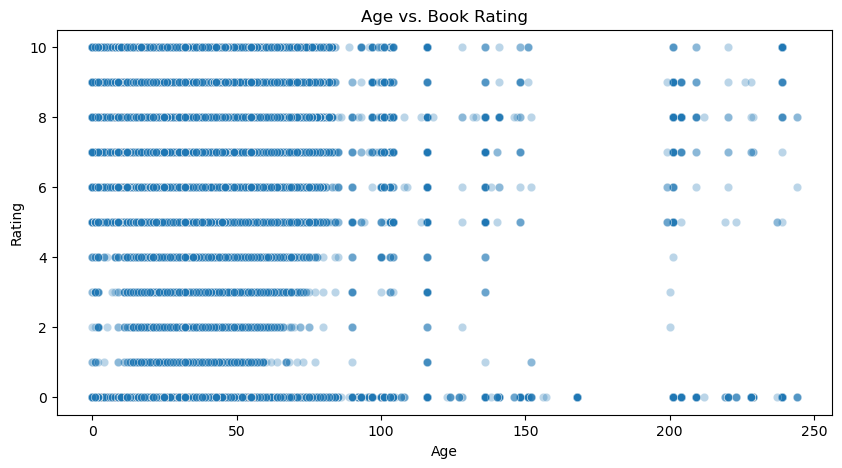

In [153]:
# Scatter plot of Age vs. Book Rating - helps in determining if age have any kind of influence on rating behaviour
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Book-Rating', data=df, alpha=0.3)
plt.title("Age vs. Book Rating")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.show()

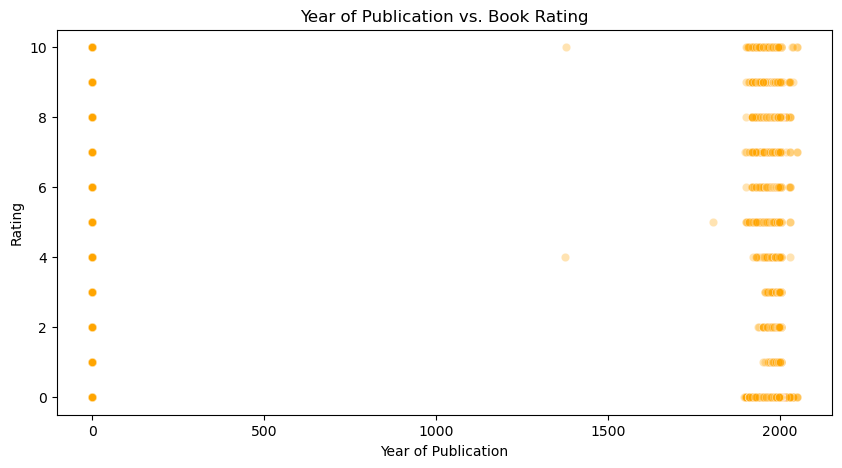

In [157]:
# Scatter plot of Year of Publication vs. Book Rating - shows if older or new books tend to get different ratings
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=df, alpha=0.3, color='orange')
plt.title("Year of Publication vs. Book Rating")
plt.xlabel("Year of Publication")
plt.ylabel("Rating")
plt.show()

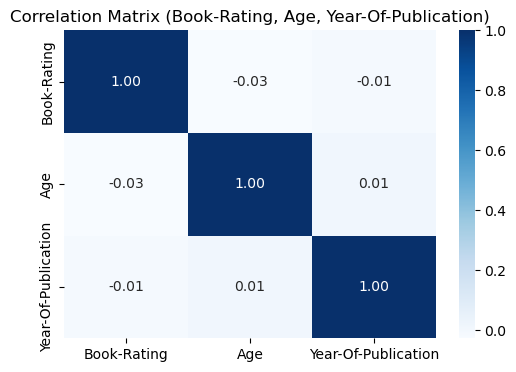

In [163]:
# Correlation Matrix for Numeric Columns - may be important for feature selection, and to understand which variables influences the ratings.
numeric_cols = ['Book-Rating', 'Age', 'Year-Of-Publication']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix (Book-Rating, Age, Year-Of-Publication)")
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_36584\1912767215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books_titles['Book-Title'], y=top_books.values, palette='viridis')


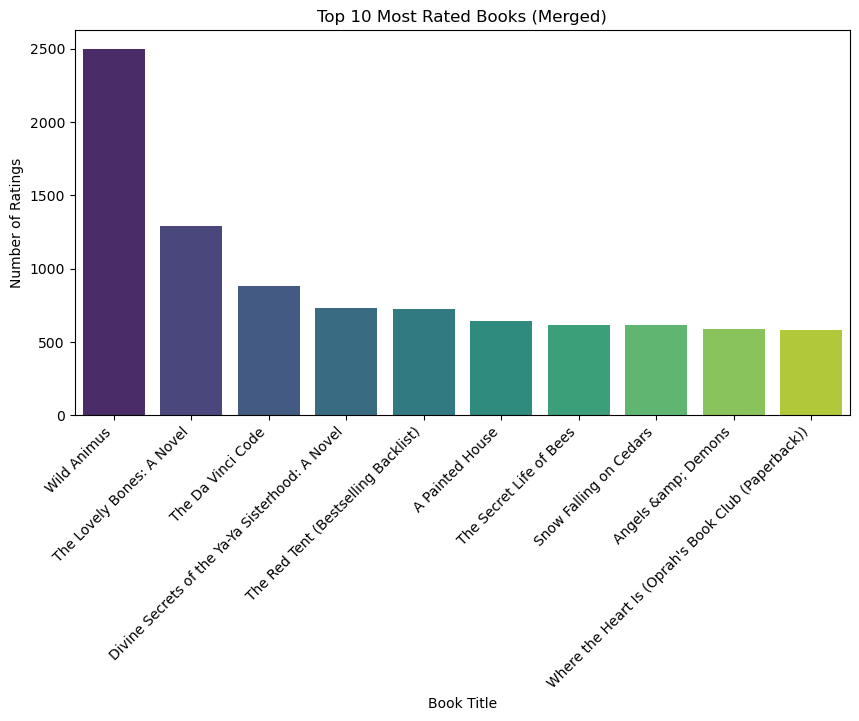

In [167]:
# Top 10 Most Rated Books from final merged Dataset - highlights most popular books based in rating, and also useful for popularity based recommendations

top_books = df['ISBN'].value_counts().head(10)
top_books_titles = df_books[df_books['ISBN'].isin(top_books.index)][['ISBN','Book-Title']].drop_duplicates()
top_books_titles = top_books_titles.set_index('ISBN').loc[top_books.index]

plt.figure(figsize=(10,5))
sns.barplot(x=top_books_titles['Book-Title'], y=top_books.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Rated Books (Merged)")
plt.xlabel("Book Title")
plt.ylabel("Number of Ratings")
plt.show()